In [2]:
import simplejson as json
import requests # http lib
import pysftp # sftp lib
import base64 #... base64 lib
from pprint import pprint # garbage
from geolite2 import geolite2 # ip geolocation lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import time

# plotting-related imports:
import folium

In [2]:
#create sftp connection to honeypot to grab logging data
with pysftp.Connection('13.58.190.48', username='ubuntu', private_key='blackbird_pub.pem') as sftp:
    sftp.get('/home/ubuntu/honeypot/results/kako.json')

SSHException: No hostkey for host 13.58.190.48 found.

In [1]:
#read raw data and saves to variable
raw_file = open('kako.json','r')
raw_captures = raw_file.readlines() # list of all json docs - as strings

In [3]:
all_captures = []
for cap in raw_captures:
    all_captures.append(json.loads(cap)) # converts str to json

In [5]:
locations = []
reader = geolite2.reader()
i=0
for cap in all_captures:
    src_ip = cap['source_ip']
    match = reader.get(src_ip)
    if match is not None:
        if match['location']['latitude'] is not None and match['location']['longitude'] is not None:
            #pprint(match)
            #print("\n\n\n\n\n\n\n")
            if 'city' in match and 'location' in match and 'country' in match:
               locations.append({
                                'lat': match['location']['latitude'], 
                                'lon': match['location']['longitude'],
                                'city': match['city']['names']['en'],
                                'country': match['country']['names']['en'],
                                'sim': cap['simulation_name'],
                                'dest_port': int(cap['destination_port']),
                                'iso_code': match['country']['iso_code']
                                } )
            


In [6]:
import time
for a in locations:
    print("city: " + a['city'])
    print("country: " + a['country'])
    print("sim: " + a['sim'])
    print("dest_port:",a['dest_port'])
#print('hi')
#for i,a in enumerate(locations):
#    print(a['dest_port'])

#print('hi2')

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: St. Catharines
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim:

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim
country: Germany
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Sundsvall
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hattersheim


country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Qingdao
country: China
sim: Linux Ge

country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North Bergen
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Gdańsk
country: Poland
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Yekaterinburg
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city:

city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Shanghai
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
country: Estonia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tallinn
coun

dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Simulation
dest_port: 80
city: Thenkasi
country: India
sim: TPLink HTTP Sim

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Moscow
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
des

dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tyumen
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Balca
country: Turkey
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Istanbul
country: Turkey
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tucson
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Jinan
country: C

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: 

country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hefei
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Claryville
country: United States
sim: Linux Generic Telnet Simulation
dest_port: 2

country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Kobe
country: Japan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Surgut
country: Russia
sim: Linux Generic Telnet Simulation
dest_port: 23
city

city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Nowshera
country: Pakistan
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Hangzhou
country: China
sim: TPLink HTTP Simul

city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Chengdu
country: China
sim: Linux 

dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Zhengzhou
country: China
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink HTTP Simulation
dest_port: 80
city: Thousand Oaks
country: United States
sim: TPLink

dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: T

dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Guangzhou
country: China
sim: T

dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
country: Brazil
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Vaxjo
country: Sweden
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Panorama
count

sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Santiago
country: Chile
sim: Linux Generic Telnet Simulation
dest_port: 23
city: Tehran
country: Iran
sim: Linux Generic Telnet Simulation
dest_port: 23
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city: North York
country: Canada
sim: TPLink HTTP Simulation
dest_port: 80
city

sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: T

country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: T

country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
countr

city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Beijing
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Ho

dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Central
country: Hong Kong
sim: TPLink HTTP Simulation
dest_port: 80
city: Centr

dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: 

dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: Xiamen
country: China
sim: TPLink HTTP Simulation
dest_port: 80
city: São Lourenço
country: Brazil
sim: TPLink HTTP Simulation
dest_port: 80

Here begin mapping shenanigans

In [7]:
m=None
m = folium.Map(no_wrap=True)

tooltip = "Click for more info"
#print(len(all_captures))
#print(len(locations))
i=0
for loc in locations:
    folium.Marker([loc['lat'],loc['lon']],tooltip=tooltip, 
                  popup='{city}, {country}: {sim}, port {port}'.format(city=loc['city'],
                                                                    country=loc['country'],
                                                                    sim=loc['sim'],
                                                                   port=loc['dest_port'])).add_to(m)
    i+=1
    if (i==500):
        break

In [8]:
m

In [16]:
 for cap in all_captures:
    print(base64.b64decode(cap['capture']).strip().decode('ascii')) # decode from base64, strip trailing newline, decode into ascii
    print('#################################')

\xff\xfevstarcam2015
20150602
enable 
linuxshell
system 
shell 
sh 
/bin/busybox SEFA 
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
#################################
GET / HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8
Accept-Language: en-US,en;q=0.5
Accept-Encoding: gzip, deflate
Connection: keep-alive
Upgrade-Insecure-Requests: 1
Authorization: Basic YmxhaDpibGFo
#################################
GET /favicon.ico HTTP/1.1
Host: 34.238.85.229
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0
Accept: text

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd9 in position 16: ordinal not in range(128)

In [17]:
 import requests
from pprint import pprint # garbage
    #payload = all_captures[-1]['capture']
 api_url = "https://exploits.shodan.io/api/search"
 #query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'MIRAI'}
 query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'crypt32'}

print(query_payload)
 r = requests.get(api_url,params=query_payload)
 pprint(r.text)

{'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'crypt32'}
('{"matches": [{"source": "CVE", "_id": "2003-0818", "description": "Multiple '
 'integer overflows in Microsoft ASN.1 library (MSASN1.DLL), as used in '
 'LSASS.EXE, CRYPT32.DLL, and other Microsoft executables and libraries on '
 'Windows NT 4.0, 2000, and XP, allow remote attackers to execute arbitrary '
 'code via ASN.1 BER encodings with (1) very large length fields that cause '
 'arbitrary heap data to be overwritten, or (2) modified bit strings.", '
 '"osvdb": [], "bid": [], "cve": ["CVE-2003-0818"], "msb": ["MS04-007"]}, '
 '{"code": "##\\r\\n# $Id: iconics_webhmi_setactivexguid.rb 12584 2011-05-11 '
 '20:45:54Z sinn3r $\\r\\n##\\r\\n\\r\\n##\\r\\n# This file is part of the '
 'Metasploit Framework and may be subject to\\r\\n# redistribution and '
 'commercial restrictions. Please see the Metasploit\\r\\n# Framework web site '
 'for more information on licensing and terms of use.\\r\\n# '
 'http://metasploit.com/fr

 '00007ffa`0faa0000 00007ffa`0fad0000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\SspiCli.dll\\r\\nModLoad: 00007ffa`11440000 '
 '00007ffa`115a6000   C:\\\\Windows\\\\System32\\\\msctf.dll\\r\\nModLoad: '
 '00007ffa`0a0a0000 00007ffa`0a1a2000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\mrmcorer.dll\\r\\nModLoad: 00007ff9`fddf0000 '
 '00007ff9`fde00000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\tokenbinding.dll\\r\\nModLoad: '
 '00007ffa`00260000 00007ffa`0027b000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\ondemandconnroutehelper.dll\\r\\nModLoad: '
 '00007ffa`0a370000 00007ffa`0a3d9000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\Bcp47Langs.dll\\r\\nModLoad: 00007ffa`07430000 '
 '00007ffa`07507000   C:\\\\Windows\\\\SYSTEM32\\\\winhttp.dll\\r\\nModLoad: '
 '00007ffa`0f420000 00007ffa`0f47c000   '
 'C:\\\\Windows\\\\system32\\\\mswsock.dll\\r\\nModLoad: 00007ffa`0a730000 '
 '00007ffa`0a73b000   C:\\\\Windows\\\\SYSTEM32\\\\WINNSI.DLL\\r\\nModLoad: '
 '00007ffa`07260000 00007ffa`07428000   '
 'C:\\\\Windows\\\\SYSTEM32\\\\urlmon.d

 '0178b000   C:\\\\Program Files\\\\JetAudio\\\\JFEFFB3D.DLL\\r\\nModLoad: '
 '017b0000 017bb000   C:\\\\Program '
 'Files\\\\JetAudio\\\\JFEFFBBE.DLL\\r\\nModLoad: 017e0000 017eb000   '
 'C:\\\\Program Files\\\\JetAudio\\\\JFEFFDRC.DLL\\r\\nModLoad: 01810000 '
 '0181b000   C:\\\\Program Files\\\\JetAudio\\\\JFEFFFX.DLL\\r\\nModLoad: '
 '01960000 0196d000   C:\\\\Program '
 'Files\\\\JetAudio\\\\JFEFFRVB.DLL\\r\\nModLoad: 01990000 0199b000   '
 'C:\\\\Program Files\\\\JetAudio\\\\JFEFFWID.DLL\\r\\nModLoad: 019c0000 '
 '019cc000   C:\\\\Program Files\\\\JetAudio\\\\JFEFFXB.DLL\\r\\nModLoad: '
 '019f0000 019fe000   C:\\\\Program '
 'Files\\\\JetAudio\\\\JFEFFEQ.DLL\\r\\nModLoad: 01aa0000 01b23000   '
 'C:\\\\Program Files\\\\JetAudio\\\\JFEXRMC.DLL\\r\\nModLoad: 76c30000 '
 '76c5e000   C:\\\\WINDOWS\\\\system32\\\\WINTRUST.dll\\r\\nModLoad: 76c90000 '
 '76cb8000   C:\\\\WINDOWS\\\\system32\\\\IMAGEHLP.dll\\r\\nModLoad: 72d20000 '
 '72d29000   C:\\\\WINDOWS\\\\system32\\\\wdmaud.drv\\r\\n

In [99]:
df=pd.DataFrame(locations)
df2=pd.DataFrame(all_captures)['source_ip']
#df2 = pd.read_csv('ip.csv')
#print(df2[['source_ip']].groupby('source_ip'))
df[['iso_code','city']].groupby('iso_code').count().sort_values(by='city',ascending=False).to_csv('results.csv',sep=",")
#df2.groupby('source_ip').count().sort_values(by='source_ip',ascending=False).to_csv('ip.csv',sep=",")

            src_ip    0
0    43.229.38.171  321
1    192.186.23.25  259
2   121.201.45.173  259
3   132.232.193.63  253
4  193.112.182.252  208
5    193.112.1.116  192
6    120.27.233.64  164
7   103.71.236.215  129
8  104.214.221.238  107
9    2.249.160.194   91


<BarContainer object of 10 artists>

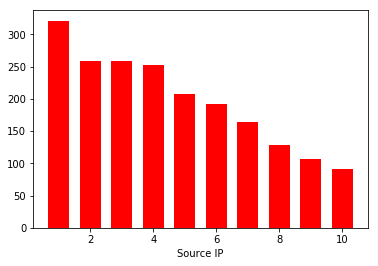

In [125]:
df2=pd.read_csv('ip.csv')
df3=df2.rename(index=str, columns={"183.192.241.114": "src_ip"}).groupby('src_ip').count().sort_values(by='0',ascending=False)
#df3=df3
df3.to_csv('pls.csv',sep=",")
df3=pd.read_csv('pls.csv')
#print(df3)
print(df3.head(10))
x=range(1,11)
#print(x)
y = df3['0'].head(10)
width = 1/1.5
N = len(y)
plt.xlabel('Source IP',rotation=0)
plt.bar(x,y,width,color="red")

<BarContainer object of 10 artists>

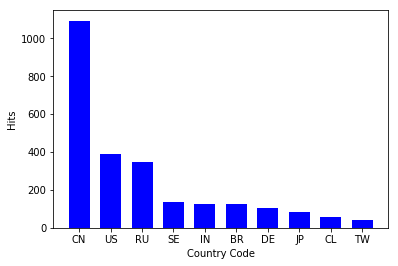

In [3]:
df2 = pd.read_csv('results.csv')
y = df2['city'].head(10)
x = df2['iso_code'].head(10)
width = 1/1.5
N = len(y)
plt.ylabel('Hits',rotation=90)
plt.xlabel('Country Code',rotation=0)
plt.bar(x,y,width,color="blue")


In [ ]:
history = []
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                if element not in dangerousMaster:
                    if element not in history:
                        history.append(element)
                        count+=1
    except UnicodeDecodeError:
        print("caught")
print(count)

In [11]:
api_url = "https://exploits.shodan.io/api/search"
 #query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': 'MIRAI'}
query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': ''}
import time
import pprint
import base64
history = []
innocuous = []
dangerous = {}
dangerousMaster = {}
warningList = []


In [12]:
# count = 0
# for cap in all_captures:
#     try:
#         temp = base64.b64decode(cap['capture']).strip().decode('ascii')
#         for temp_line in temp.split('\r\n'):
#             for element in temp_line.split(' '):
#                 if element not in dangerousMaster:
#                     if element not in history:
#                         try: 
#                             history.append(element)
#                             count+=1
#                             if (count % 10 == 0):
#                                 print(count, "out of 1140")
#                             query_payload['query'] = element
#                             #print("Trying: " + element)
#                             r = requests.get(api_url,params=query_payload)
#                             time.sleep(1)
#                             if not (r.status_code == 503):
#                                 r2 = json.loads(r.text)
                                
#                                 if( 'matches' not in r2 or r2["matches"] == [] ):
#                               #      print("No response: " + element)
#                                     innocuous.append(element)
#                                 else:
#                                     dangerous[element]  = []
#                                     for i in r2["matches"]:
#                                         if("cve" in i and i["cve"] != []):
#                                            # print("Found CVE's")
#                                             dangerous[element].append(i["cve"])
#                                     dangerousMaster[element] = dangerous[element]
                                    
#                                #     print("Response: " + element)

#                             #else:
#                                 #print("Skipping: " + element)

#                         except AttributeError:
#                             continue
#                     #        print("Skipping: " + element)
#                 else:
#                     dangerous[element] = dangerousMaster[element]

#         if dangerous != {}:
#             print("New Packet being written")
#             path = "CVEball.txt"
#             jsonball = {"capture": cap,"shodan_hits": dangerous}

#             with open(path, 'ab+') as f:
#                 f.seek(0,2)                                #Go to the end of file    
#                 if f.tell() == 0 :                         #Check if file is empty
#                     f.write(json.dumps([jsonball]).encode())  #If empty, write an array
#                 else :
#                     f.seek(-1,2)           
#                     f.truncate()                           #Remove the last character, open the array
#                     f.write(' , '.encode())                #Write the separator
#                     f.write(json.dumps(jsonball).encode())    #Dump the dictionary
#                     f.write(']'.encode())                  #Close the array
#             dangerous = {}
            
#     except UnicodeDecodeError:
#         print("UnicodeDecodeError")

New Packet being written
10 out of 1140
20 out of 1140
30 out of 1140
New Packet being written
New Packet being written
New Packet being written
40 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
50 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
60 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
70 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
80 out of 1140
New Packet being written
New Packet being written
New P

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
260 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packe

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
350 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
360 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being w

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
490 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packe

New Packet being written
New Packet being written
New Packet being written
540 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packe

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
650 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
660 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
670 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
Ne

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


New Packet being written
New Packet being written
New Packet being written
1020 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
1030 out of 1140
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being

New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written
New Packet being written


In [38]:
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                history.append(element)
                count+=1
    except UnicodeDecodeError:
        continue
        #print("caught")
print("Unoptimized queries/ length in seconds: ",count)
print("in hours: ","{:.2f}".format(count/60/60))

temphistory = []
tempdangerousMaster = []
count = 0
for cap in all_captures:
    #print(cap['capture'])
    try:
        temp = base64.b64decode(cap['capture']).strip().decode('ascii')
        for temp_line in temp.split('\r\n'):
            for element in temp_line.split(' '):
                if element not in tempdangerousMaster:
                    if element not in temphistory:
                        temphistory.append(element)
                        count+=1
    except UnicodeDecodeError:
        continue
        #print("caught")
print("Optimized queries/ length in seconds: ",count)
print("in minutes: ", "{:.2f}".format(count/60))

Unoptimized queries/ length in seconds:  72321
in hours:  20.09
Optimized queries/ length in seconds:  1146
in minutes:  19.10


In [21]:
#CVEball.txt
raw_CVE_ball = open('CVEball.txt','r')
raw_CVE_ball_captures = raw_CVE_ball.readlines() # list of all json docs - as strings
all_CVE_ball_captures = []
for cap in raw_CVE_ball_captures:
    all_CVE_ball_captures.append(json.loads(cap)) # converts str to json

all_CVE_ball_captures = all_CVE_ball_captures[0] #since is an array with len 1

In [74]:
print("Out of our", len(all_captures), "captured packets", len(all_CVE_ball_captures), "are potentially threatening")
print("Turned 3M of packet data into 46M of packet data and CVE names - an increase of 1533%")
print("Future work: optimize data processing/ data storage.  Kako stores everything in text files.  Integrate a database for   data storage")
print("Future work: determine if",len(all_CVE_ball_captures),"/",len(all_captures),"packets are truly potentially threatening - this is a honeypot afterall... this      might be appropriate")

Out of our 4508 captured packets 4485 are potentially threatening
Turned 3M of packet data into 46M of packet data and CVE names - an increase of 1533%
Future work: optimize data processing/ data storage.  Kako stores everything in text files.  Integrate a database for   data storage
Future work: determine if 4485 / 4508 packets are truly potentially threatening - this is a honeypot afterall... this      might be appropriate


In [73]:
CVE_counter=0
CVE_ball = []

for hit in all_CVE_ball_captures[0]['shodan_hits']:
    for CVE_list in all_CVE_ball_captures[0]['shodan_hits'][hit]:
        for CVE in CVE_list:
            if CVE not in CVE_ball:
                CVE_ball.append(CVE)
                CVE_counter+=1

print("First packets contents start")
print(base64.b64decode(all_CVE_ball_captures[0]['capture']['capture']).strip().decode('ascii'))
print("First packets contents end")
print()
print("# of unique CVE's attached to the first packet:",len(CVE_ball))
print("First packet post-processing:")
print(all_CVE_ball_captures[0]) #sample processed packet

First packets contents start
\xff\xfevstarcam2015
20150602
enable 
linuxshell
system 
shell 
sh 
/bin/busybox SEFA 
First packets contents end

# of unique CVE's attached to the first packet: 313
First packet post-processing:
{'capture': {'capture': 'XHhmZlx4ZmUBdnN0YXJjYW0yMDE1DQoyMDE1MDYwMg0KZW5hYmxlAA0KbGludXhzaGVsbAQNCnN5c3RlbQANCnNoZWxsAA0Kc2gADQovYmluL2J1c3lib3ggU0VGQQANCg==', 'destination_ip': 'TODO', 'destination_port': 23, 'node': 'ip-172-31-85-137', 'simulation_name': 'Linux Generic Telnet Simulation', 'simulation_version': '0.1.0', 'source_ip': '183.192.241.114', 'source_port': 59702, 'timestamp': 1540958462, 'vulnerability': 'UNKNOWN'}, 'shodan_hits': {'enable\x00': [['CVE-2016-7067'], ['CVE-2019-7551'], ['CVE-2019-0161'], ['CVE-2012-5547'], ['CVE-2018-7236'], ['CVE-2019-0218'], ['CVE-2000-0267'], ['CVE-2017-3758'], ['CVE-2013-5730'], ['CVE-2010-4507'], ['CVE-2001-0715'], ['CVE-2001-0753'], ['CVE-2007-6501'], ['CVE-2015-4629'], ['CVE-2017-15618'], ['CVE-2017-3194'], ['CVE

In [87]:
keywords = []
for capture in all_CVE_ball_captures:
     for hit in capture['shodan_hits']:
            if hit == '/phpMyAdmin/phpMyAdmin/index.php':
                print(capture)
                break
        
        #for CVE_list in capture['shodan_hits'][hit]:
            
                

{'capture': {'capture': 'R0VUIC9waHBNeUFkbWluL3BocE15QWRtaW4vaW5kZXgucGhwIEhUVFAvMS4xDQpVc2VyLUFnZW50OiBNb3ppbGxhLzUuMCAoV2luZG93cyBOVCA2LjE7IFdPVzY0OyBydjo1Ny4wKSBHZWNrby8yMDEwMDEwMSBGaXJlZm94LzU3LjANCkhvc3Q6IDM0LjIzOC44NS4yMjkNCkNvbm5lY3Rpb246IEtlZXAtQWxpdmUNCkNhY2hlLUNvbnRyb2w6IG5vLWNhY2hlDQoNCg==', 'destination_ip': 'TODO', 'destination_port': 80, 'node': 'ip-172-31-85-137', 'simulation_name': 'TPLink HTTP Simulation', 'simulation_version': '0.1.0', 'source_ip': '117.218.78.216', 'source_port': 41547, 'timestamp': 1541001243, 'vulnerability': 'UNKNOWN'}, 'shodan_hits': {'GET': [['CVE-1999-0239'], ['CVE-2018-1000067'], ['CVE-2004-2327'], ['CVE-2017-8101'], ['CVE-2018-20371'], ['CVE-1999-1035'], ['CVE-1999-0277'], ['CVE-2018-19133'], ['CVE-2017-7416'], ['CVE-1999-0996'], ['CVE-2000-0838'], ['CVE-2000-0484'], ['CVE-2000-1038'], ['CVE-2017-9774'], ['CVE-2018-19104'], ['CVE-2018-3735'], ['CVE-2019-11066'], ['CVE-2018-19983'], ['CVE-2004-0316'], ['CVE-2018-7187'], ['CVE-2000-0641'], ['CV

In [83]:
query_payload = {'key': 'ZZ0bFuYl0odZPu2XFWxq34wfIRipdeUW', 'query': '/phpMyAdmin/phpMyAdmin/index.php'}

r = requests.get(api_url,params=query_payload)
print(r.text)

{"matches": [{"code": "source: https://www.securityfocus.com/bid/35531/info\r\n\r\nphpMyAdmin is prone to a cross-site scripting vulnerability because it fails to sufficiently sanitize user-supplied data.\r\n\r\nAn attacker may leverage this issue to execute arbitrary script code in the browser of an unsuspecting user in the context of the affected site. This may allow the attacker to steal cookie-based authentication credentials and to launch other attacks.\r\n\r\nThe following versions are affected:\r\n\r\nphpMyAdmin 3.2.0.1\r\nphpMyAdmin 3.2.1-dev\r\nphpMyAdmin 3.3.0-dev\r\nphpMyAdmin 2.11.10-dev\r\nphpMyAdmin 3.2.0-rc1\r\n\r\nOther versions may also be affected. \r\n\r\nhttp://www.example.com/MAINT_3_2_0/index.php?db=%22%3E%27%3E%3Cscript%3Ealert%28%2Fr0t%2F%29%3C%2Fscript%3E&token=f70d8ec4305c5a877f56c14554aced10", "description": "phpMyAdmin 3.3.0 - 'db' Cross-Site Scripting", "author": "r0t", "_id": 33060, "source": "ExploitDB", "platform": "php", "date": "2009-05-30T00:00:00+00: